In [1]:
import os
%matplotlib inline 
import matplotlib.pyplot as plt

from models.cycleGAN import CycleGAN
from utils.loaders import DataLoader

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Using TensorFlow backend.


In [2]:
# run params
SECTION = 'mlz'
RUN_ID = '0002'
DATA_NAME = 'diff_specular'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

#mode =  'build' # 'build' # 
mode = ''

In [3]:
IMAGE_SIZE = 128

In [4]:
data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))


In [5]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0002
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    #gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights-90.h5'))
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights-66.h5'))
imgs_B = data_loader.load_img('data/diff_specular/trainB/33.jpg')
#imgs_B = data_loader.load_img('data/jpeg/testB/10.jpg')
fake_A = gan.g_BA.predict(imgs_B)
gen_imgs = np.concatenate([imgs_B, fake_A])

r, c = 1, 2
# Rescale images 0 - 1
gen_imgs = 0.5 * gen_imgs + 0.5
gen_imgs = np.clip(gen_imgs, 0, 1)

titles = ['Original', 'Translated']
fig, axs = plt.subplots(r, c, figsize=(25,12.5))
cnt = 0
for j in range(c):
    axs[j].imshow(gen_imgs[cnt])
    axs[j].set_title(titles[j])
    axs[j].axis('off')
    cnt += 1
fig.savefig(os.path.join(RUN_FOLDER ,"temps/test.png"))
plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)
0.529029130935669
(1, 256, 256, 3)


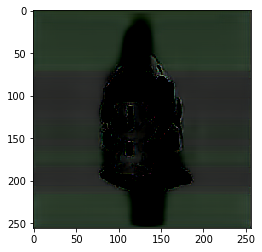

In [29]:
import time

imgs_B = data_loader.load_img('data/pbr_data/trainB/11.png')
start_time = time.time()
t_B = gan.g_BA.predict(imgs_B)
out_img = np.squeeze(t_B)
print(out_img.shape)
imgplot = plt.imshow(out_img)
#t_B_A = gan.g_AB.predict(t_B)
#out_B = gan.g_BA.predict(t_B_A)
elapsed_time = time.time() - start_time
print(elapsed_time)
print(t_B.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)
0.8820590972900391
(1, 256, 256, 3)


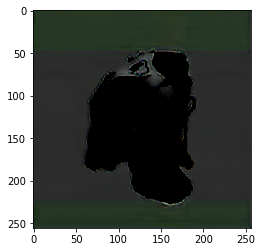

In [6]:
import time

imgs_A = data_loader.load_img('data/pbr_data/testA/64.png')
start_time = time.time()
t_B = gan.g_AB.predict(imgs_A)
t_A = gan.g_BA.predict(t_B)
out_img = np.squeeze(t_A)
print(out_img.shape)
imgplot = plt.imshow(out_img)
#t_B_A = gan.g_AB.predict(t_B)
#out_B = gan.g_BA.predict(t_B_A)
elapsed_time = time.time() - start_time
print(elapsed_time)
print(t_B.shape)

In [11]:
x = np.arange(10)
outfile = os.path.join(RUN_FOLDER, 'loss.npy')
np.save(outfile, x)

In [12]:
 np.load(outfile)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])